# Heart Attack Data Exploration

In [2]:
#!pip install imbalanced-learn

In [37]:
#!pip install xgboost

In [71]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy import stats
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline



## Loading and Preprocessing Heart Attack Data

In [2]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [3]:
df_heart.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [19]:
# Define target vector
y = df_heart["Heart Attack Risk"]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [31]:
# Define features set
X = df_heart.copy()
# Drop interfering and target columns
X.drop(["Patient ID","Country","Continent","Hemisphere",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk",
        "Stress Level", "Sex"], axis=1, inplace=True)
X['SystolicBP'] = X['Blood Pressure'].str.split("/").str[0]
X['DiastolicBP'] = X['Blood Pressure'].str.split("/").str[1]
X.drop(["Blood Pressure"], axis=1, inplace=True)
X.head()

Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0   67          208          72                 4.168189   
1   21          389          98                 1.813242   
2   21          324          72                 2.078353   
3   84          383          73                 9.828130   
4   66          318          93                 5.804299   

   Sedentary Hours Per Day  Income        BMI  Triglycerides SystolicBP  \
0                 6.615001  261404  31.251233            286        158   
1                 4.963459  285768  27.194973            235        165   
2                 9.463426  235282  28.176571            587        174   
3                 7.648981  125640  36.464704            378        163   
4                 1.514821  160555  21.809144            231         91   

  DiastolicBP  
0          88  
1          93  
2          99  
3         100  
4          88

In [9]:
# Define features set
#X = df_heart.copy()
# Drop interfering and target columns
#X.drop(["Patient ID","Continent","Hemisphere", "Alcohol Consumption", "Smoking",
       # "Medication Use", "Sleep Hours Per Day", "Country", "Physical Activity Days Per Week", "Heart Attack Risk",
       # "Sex", "Diet"], axis=1, inplace=True)
#X['SystolicBP'] = X['Blood Pressure'].str.split("/").str[0]
#X['DiastolicBP'] = X['Blood Pressure'].str.split("/").str[1]
#X.drop(["Blood Pressure"], axis=1, inplace=True)

#X.head()

Age  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
0   67          208         158/88          72         0               0   
1   21          389         165/93          98         1               1   
2   21          324         174/99          72         1               0   
3   84          383        163/100          73         1               1   
4   66          318          91/88          93         1               1   

   Obesity  Exercise Hours Per Week  Previous Heart Problems  Stress Level  \
0        0                 4.168189                        0             9   
1        1                 1.813242                        1             1   
2        0                 2.078353                        1             9   
3        0                 9.828130                        1             9   
4        1                 5.804299                        1             6   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  
0                 6.615001  261404  31.251233            286  
1                 4.963459  285768  27.194973            235  
2                 9.463426  235282  28.176571            587  
3                 7.648981  125640  36.464704            378  
4                 1.514821  160555  21.809144            231

In [57]:
# Convert float numbers to int to reduce number of unique values
X['Exercise Hours Per Week'] = X['Exercise Hours Per Week'].astype(int)
X['Sedentary Hours Per Day'] = X['Sedentary Hours Per Day'].astype(int)
X['BMI'] = X['BMI'].astype(int)
X.nunique()

Age                          73
Cholesterol                 281
Heart Rate                   71
Exercise Hours Per Week      20
Sedentary Hours Per Day      12
Income                     8615
BMI                          22
Triglycerides               771
SystolicBP                   91
DiastolicBP                  51
dtype: int64

In [72]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Applying NearMiss
#nm1 = NearMiss(version=1)
#X_resampled, y_resampled = nm1.fit_resample(X_train, y_train)

# Applying RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [73]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [74]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_resampled)
#X_scaler = scaler.fit(X_train)

In [75]:
# Scaling data
X_train_scaled = X_scaler.transform(X_resampled)
#X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [76]:
#import xgboost as xgb

# Initialize the XGBoost classifier
#model_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False, random_state=42)

# Fit the model with the training data
#model_xgb.fit(X_train_scaled, y_resampled)

In [77]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100)

In [78]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_resampled)

## Making Predictions Using the Random Forest Model

In [79]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
#predictions_xgb = model_xgb.predict(X_test_scaled)

## Model Evaluation

In [80]:
# Calculating the confusion matrix
#cm = confusion_matrix(y_test, predictions_xgb)
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
#acc_score = accuracy_score(y_test, predictions_xgb)
acc_score = accuracy_score(y_test, predictions)

In [81]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
#print(classification_report(y_test, predictions_xgb))
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0          591          534
Actual 1          297          331

Confusion matrix Accuracy Score : 0.5259555048488306
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.53      0.59      1125
           1       0.38      0.53      0.44       628

    accuracy                           0.53      1753
   macro avg       0.52      0.53      0.52      1753
weighted avg       0.56      0.53      0.54      1753



## Feature Importance

[(0.15707016848759373, 'Income'), (0.15238392802398326, 'Triglycerides'), (0.1451299632778641, 'Cholesterol'), (0.13172363318538774, 'Heart Rate'), (0.12880146979007223, 'Age'), (0.10242373785300327, 'BMI'), (0.09600737072507838, 'Exercise Hours Per Week'), (0.08645972865701744, 'Sedentary Hours Per Day')]


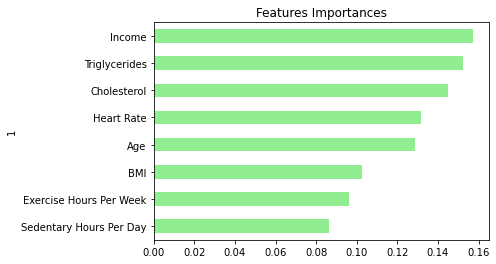

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can visualise and sort the features by their importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
print(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

## Deep learning model

In [6]:
# Import dependencies and determine the number of unique values in each column
import tensorflow as tf
X.nunique()

Age                          73
Cholesterol                 281
Heart Rate                   71
Exercise Hours Per Week    8763
Sedentary Hours Per Day    8763
Income                     8615
BMI                        8763
Triglycerides               771
dtype: int64

In [44]:
# Get the min and max for range
print(X['Age'].min(), X['Age'].max())
print(X['Cholesterol'].min(), X['Cholesterol'].max())
print(X['Heart Rate'].min(), X['Heart Rate'].max())
print(X['Exercise Hours Per Week'].min(), X['Exercise Hours Per Week'].max())
print(X['Sedentary Hours Per Day'].min(), X['Sedentary Hours Per Day'].max())
print(X['Income'].min(), X['Income'].max())
print(X['BMI'].min(), X['BMI'].max())
print(X['Triglycerides'].min(), X['Triglycerides'].max())


18 90
120 400
40 110
0 19
0 11
20062 299954
18 39
30 800


In [45]:
# Bin all columns except for exercise and sedentary hours per week

X['Age'] = pd.qcut(X['Age'], 10, 
                   labels=np.linspace(X['Age'].min(), X['Age'].max(), 
                                      num=10, dtype=np.int64))

X['Cholesterol'] = pd.qcut(X['Cholesterol'], 10, 
                           labels=np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 
                                              num=10, dtype=np.int64))

X['Heart Rate'] = pd.qcut(X['Heart Rate'], 10, 
                           labels=np.linspace(X['Heart Rate'].min(), X['Heart Rate'].max(), 
                                              num=10, dtype=np.int64))

X['Income'] = pd.qcut(X['Income'], 10, 
                           labels=np.linspace(X['Income'].min(), X['Income'].max(), 
                                              num=10, dtype=np.int64))

X['BMI'] = pd.qcut(X['BMI'], 10, 
                           labels=np.linspace(X['BMI'].min(), X['BMI'].max(), 
                                              num=10, dtype=np.int64))

X['Triglycerides'] = pd.qcut(X['Triglycerides'], 10, 
                           labels=np.linspace(X['Triglycerides'].min(), X['Triglycerides'].max(), 
                                              num=10, dtype=np.int64))

X.head()

Age Cholesterol Heart Rate  Exercise Hours Per Week  \
0  66         213         71                        4   
1  18         400        102                        1   
2  18         337         71                        2   
3  90         400         71                        9   
4  66         337         94                        5   

   Sedentary Hours Per Day  Income BMI Triglycerides  
0                        6  268854  32           286  
1                        4  299954  27           201  
2                        9  237755  27           628  
3                        7  113359  36           372  
4                        1  175557  20           201

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [102]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [104]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/50
206/206 [==============================] - 1s 1ms/step - loss: 0.6615 - accuracy: 0.6334
Epoch 2/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6398
Epoch 3/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6398
Epoch 4/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6398
Epoch 5/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6397
Epoch 6/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6398
Epoch 7/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6398
Epoch 8/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6398
Epoch 9/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.6400
Epoch 10/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6398

In [105]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

69/69 - 0s - loss: 0.6784 - accuracy: 0.6298 - 411ms/epoch - 6ms/step
Loss: 0.678375244140625, Accuracy: 0.629849374294281


## Auto-optimisation

In [114]:
!pip install keras_tuner

In [112]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=8))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [116]:
# Import the kerastuner library
import keras_tuner as kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 01m 20s]
val_accuracy: 0.6481058597564697

Best val_accuracy So Far: 0.6526700258255005
Total elapsed time: 01h 21m 41s


In [117]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 1,
 'num_layers': 1,
 'units_0': 1,
 'units_1': 6,
 'units_2': 26,
 'units_3': 21,
 'units_4': 6,
 'units_5': 1,
 'tuner/epochs': 8,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 3,
 'tuner/round': 0}

In [118]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

69/69 - 0s - loss: 0.6559 - accuracy: 0.6527 - 236ms/epoch - 3ms/step
Loss: 0.6558696031570435, Accuracy: 0.6526700258255005
